# Representation Clustering
* K-Means
* EM for Mixture Gaussian
* Agglomerative hierarchical clustering

## K-Means
* K-means clustering on the iris dataset. 
* Plot and visualize the clusters in 3-D
* Choosing 'K'
* n_init parameter
* Visualizing cluster centers with each iteration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
# Load iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target

What is the difference between calling KMeans and any classifier using sklearn?

In [3]:
# Initialize k-means
k_means = KMeans(n_clusters=3, init='random')
# Fit the k-means by passing it the input
k_means.fit(X)
# Retrieve labels (cluster ids) for all the inputs
labels = k_means.labels_

In [9]:
# One label (cluster id) for each point in training data
print(np.unique(labels))
print (len(labels))
print (labels[0])
print (labels[80])
print (labels[139])

[0 1 2]
150
0
2
1


In [10]:
# Sum of distances of samples to their closest cluster center.
print (k_means.inertia_)
# Same as the cost function we have been discussing

78.9408414261


# Using k-means++

In [11]:
# Initialize k-means
k_means = KMeans(n_clusters=3, init='k-means++') 
# Fit the k-means by passing it the input
k_means.fit(X)
# Retrieve labels (cluster ids) for all the inputs
labels = k_means.labels_

# Plotting the clusters in 3-D using Axes3D library

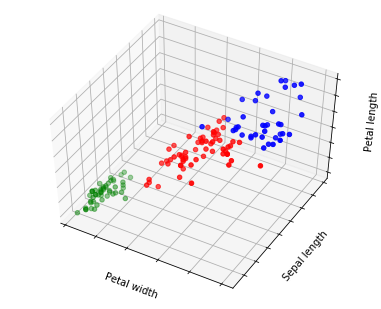

78.9408414261


In [13]:
colors = ['red','green','blue','purple', 'black']
colors_1 = [colors[labels[i]] for i in range(len(labels))]

fig = plt.figure(1, figsize=(5, 4))
plt.clf()
# 'elev' stores the elevation angle in the z plane
ax = Axes3D(fig, elev=50)
plt.cla()#clear axes
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=colors_1)# Plotting just three columns, because we can't plot 4!
ax.w_xaxis.set_ticklabels([]) # Removes markings along the axes
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()
print (k_means.inertia_)

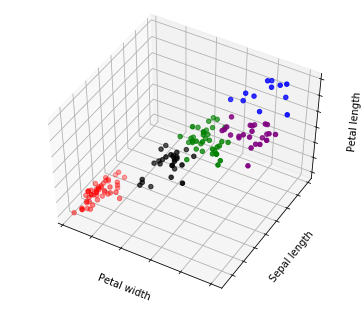

46.5505726727


In [14]:
# Change number of clusters to 5 and repeat
colors = ['red','green','blue','purple', 'black']

k_means = KMeans(n_clusters=5) 
k_means.fit(X)
labels = k_means.labels_
colors_1 = [colors[labels[i]] for i in range(len(labels))]
fig = plt.figure(1, figsize=(5, 4))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=50)#, azim=134)
plt.cla()
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=colors_1)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()
print (k_means.inertia_)

# Number of clusters v/s inertia

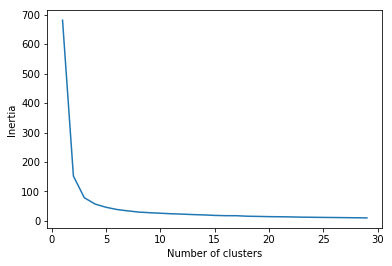

In [15]:
plt.clf()
n_list = np.arange(1,30,1)
inertia = []
for n in n_list: 
    k_means = KMeans(n_clusters=n) 
    k_means.fit(X)
    inertia.append(k_means.inertia_)
plt.plot(n_list, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Elbow Method: See the elbow and decide that to be your value of 'K'

# The n_init parameter

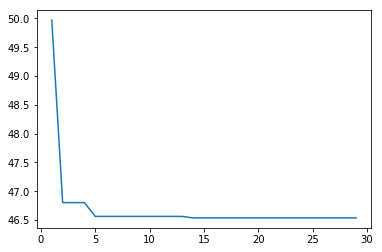

In [16]:
# n_init = Number of time the k-means algorithm will be run 
# with different centroid seeds. The final results will be 
# the best output of n_init consecutive runs in terms of inertia.

plt.clf()
n_init_list = np.arange(1,30,1)
inertia = []
for n in n_init_list: 
    k_means = KMeans(n_clusters=5, n_init=n, init='random', random_state=5) 
    k_means.fit(X)
    inertia.append(k_means.inertia_)
plt.plot(n_init_list, inertia)
plt.show()

# Visualizing the Centers with iteration

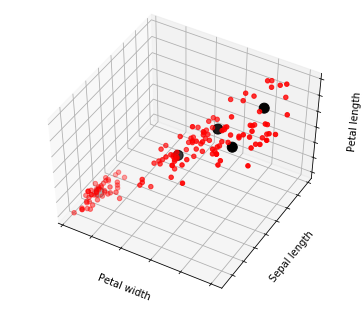

57.469825346


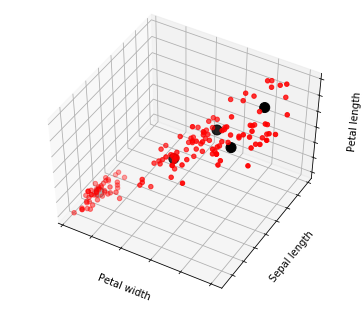

55.1547699029


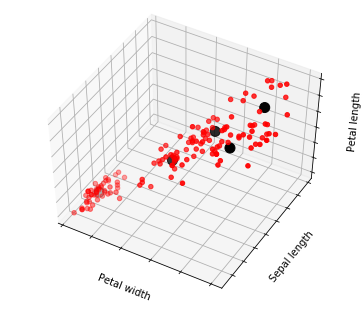

54.123708788


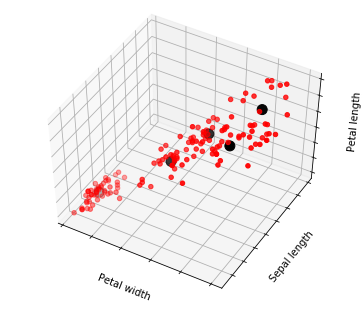

51.0260673326


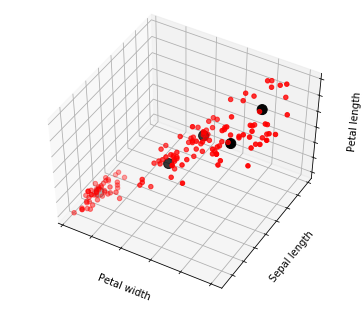

49.9853657143


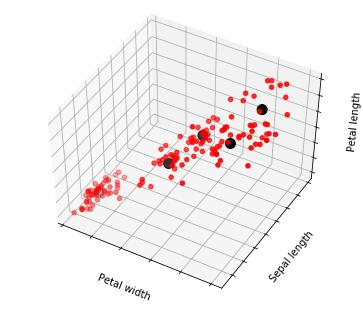

49.9693972527


In [17]:
for i in np.arange(1,7,1):
    k_means = KMeans(n_clusters=5, n_init=1, max_iter=i, init='random', random_state=5) 
    k_means.fit(X)
    labels = k_means.labels_
    colors_1 = [colors[labels[i]] for i in range(len(labels))]
    fig = plt.figure(1, figsize=(5, 4))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=50)#, azim=134)
    plt.cla()
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c='red')
    ax.scatter(k_means.cluster_centers_[:,3], k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,2], c='black',s=100)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    plt.show()
    print (k_means.inertia_)

# Agglomerative Clustering

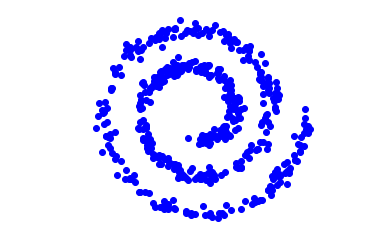

In [18]:
# Authors: Gael Varoquaux, Nelle Varoquaux
# License: BSD 3 clause

import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering

# Generate sample data
n_samples = 500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)

X = np.concatenate((x, y))
X += .7 * np.random.randn(2, n_samples)
X = X.T
plt.scatter(X[:, 0], X[:, 1], c='blue', cmap=plt.cm.spectral)
plt.axis('equal')
plt.axis('off')
plt.show()

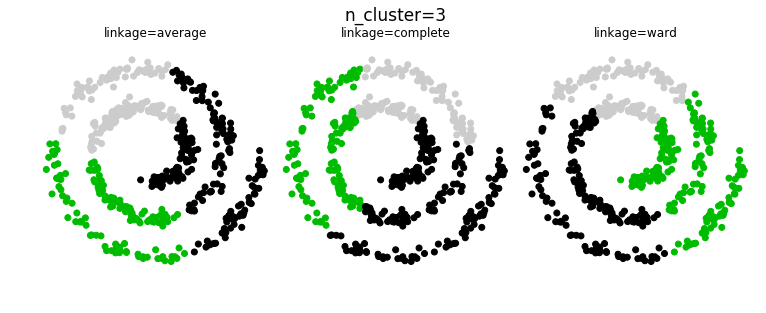

In [19]:
n_clusters = 3

plt.figure(figsize=(10, 4))
for index, linkage in enumerate(('average', 'complete', 'ward')):
    plt.subplot(1, 3, index + 1)
    model = AgglomerativeClustering(linkage=linkage,
                                   n_clusters=n_clusters)
    t0 = time.time()
    model.fit(X)
    elapsed_time = time.time() - t0
    plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
              cmap=plt.cm.spectral)
    plt.title('linkage=%s' % (linkage),
                 fontdict=dict(verticalalignment='top'))
    plt.axis('equal')
    plt.axis('off')

    plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
    plt.suptitle('n_cluster=%i' %
                         (n_clusters), size=17)


plt.show()